# **Task 5: Decision Trees and Random Forests**


> Dataset used :Heart Disease Dataset

> https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download
---



In [4]:
# Importing all the Required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## **Loading and exploring the Dataset**

In [5]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [6]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
print("Checking null values in the dataset :")
display(df.isnull().sum())
print("\nNo Null values found in the dataset.")

Checking null values in the dataset :


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0



No Null values found in the dataset.


## **Features, Target and Train-Test Split**

In [9]:
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

print("Features:", X.shape, " Target:", y.shape)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Features: (1025, 13)  Target: (1025,)


### **Decision Tree Classifier**

In [10]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9853658536585366

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# **Decision Tree Visualization**

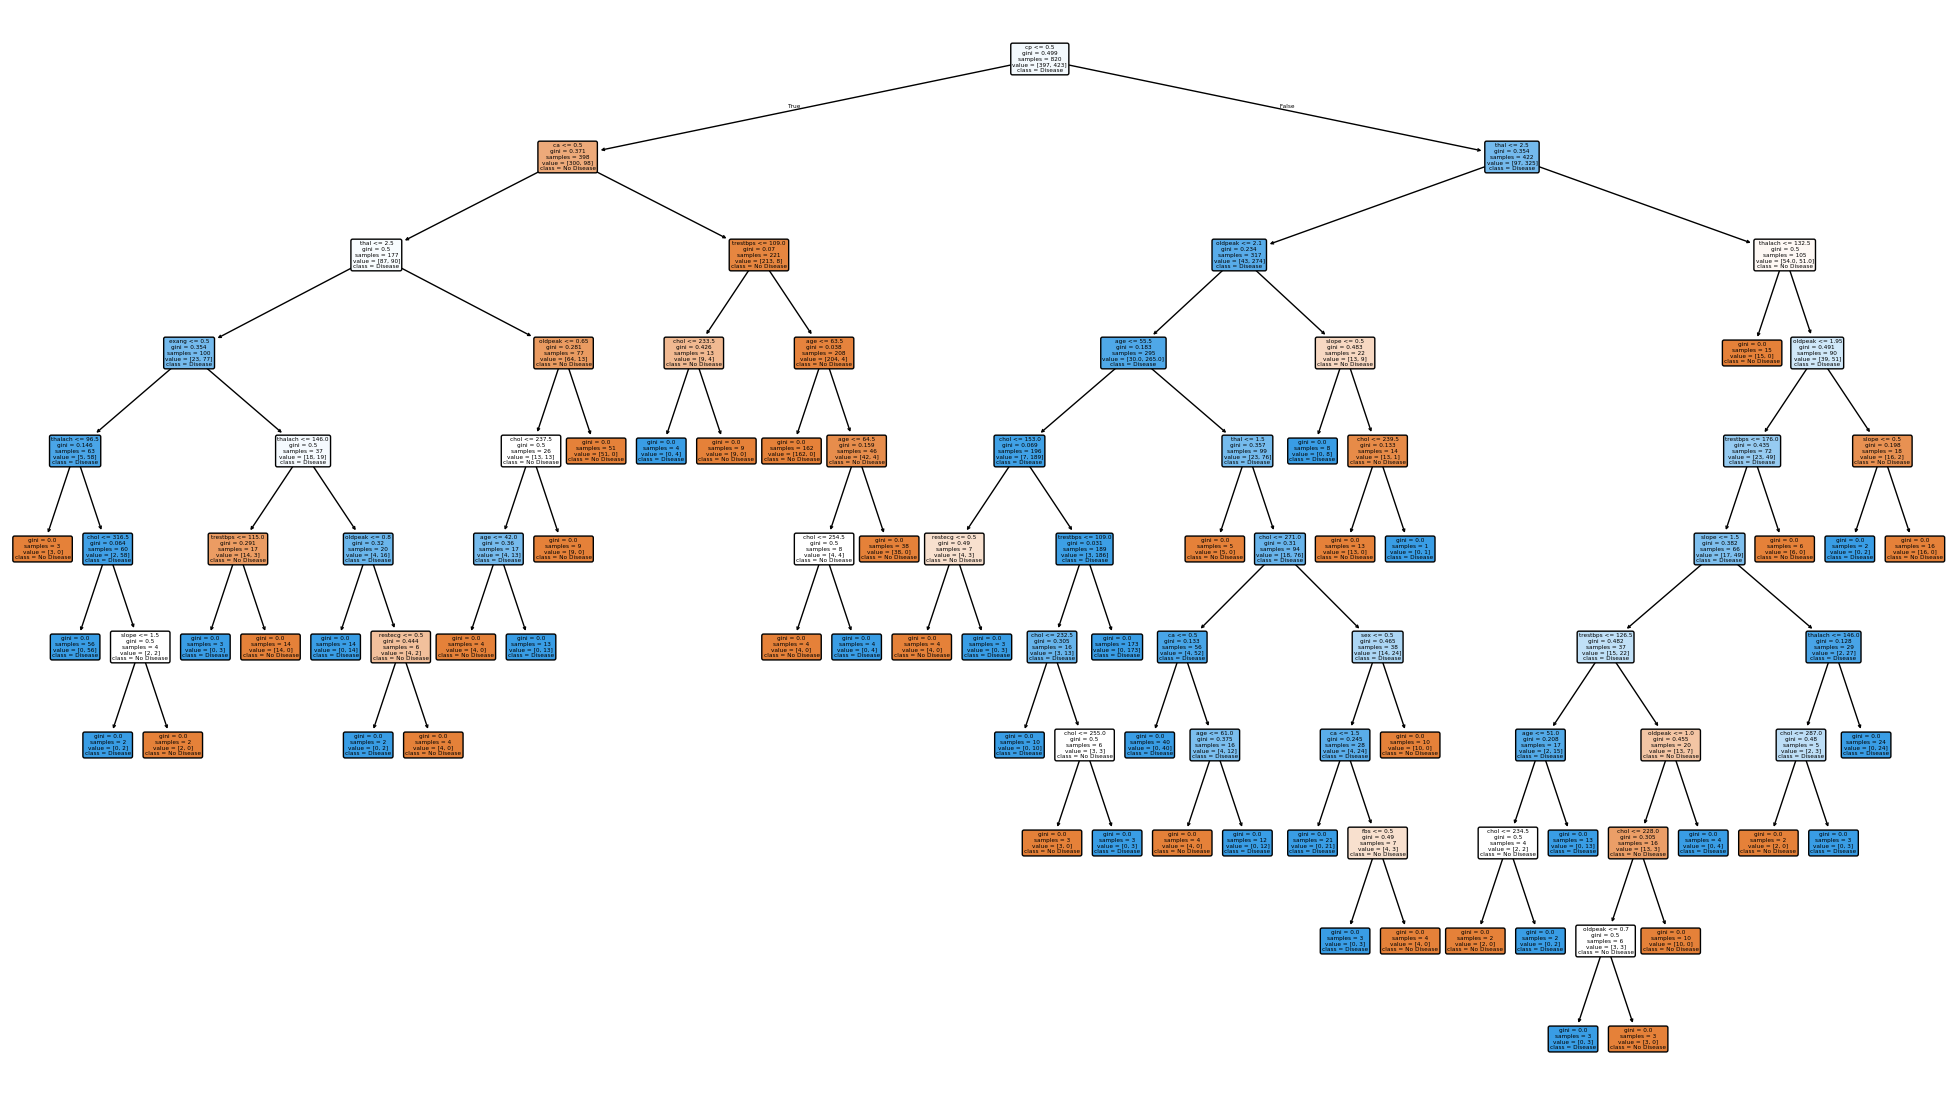

In [12]:
from sklearn import tree
plt.figure(figsize=(25, 14))
tree.plot_tree(dt, filled=True,rounded=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()


## **Controlling overfitting [max depth =4]**

In [13]:
dt_limit= DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limit.fit(X_train, y_train)
y_pred_limit = dt_limit.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_limit))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_limit))

Decision Tree Accuracy: 0.8

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



## **Random Forest Classifier**

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## **Random forest feature importance**

---



In [15]:
importances = rf.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_df = feat_df.sort_values("Importance", ascending=False)


/tmp/ipython-input-2915285521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")


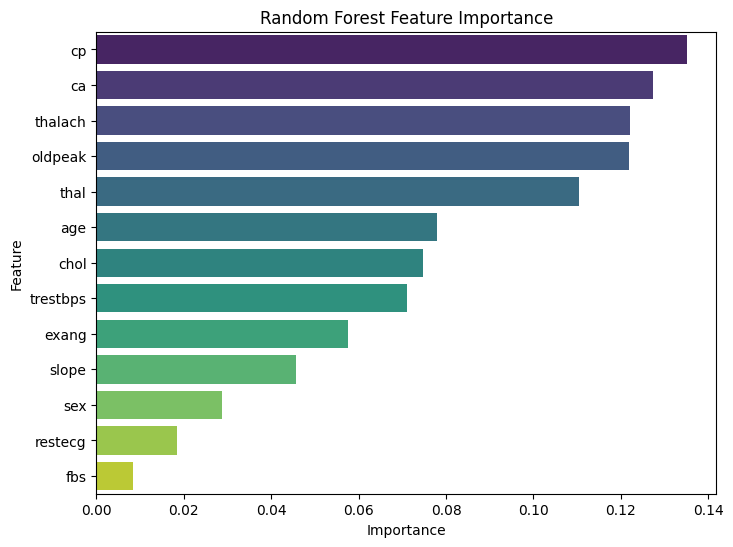

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.show()

## **Cross-Validation.**

In [17]:
cv_scores = cross_val_score(dt, X, y, cv=5)
print("\nDecision Tree Cross_validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Decision Tree Cross_validation Accuracy: 100.00%


In [18]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("\nRandom Forest Cross_validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Random Forest Cross_validation Accuracy: 99.71%
